```{figure} ../../figures/checked.png
---
width: 35%
align: right
```

Filmpje
Python code check
Vertaling figuur (of weg?)

# Bouncing ball in a tube

<table style="width: 100%; border-collapse: collapse; border: none;">
    <tr style="background-color: var(--background-color);">  
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Author:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Norbert van Veen</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Time:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">30 minutes</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Age group:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">all</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Concepts:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Frequency, amplitude</td>
    </tr>
</table><br>


## Introduction
A demonstration suitable for all students. For younger students, the demonstration can be used to illustrate sound as vibration and assist in explaining concepts like frequency and amplitude. With older students, the demonstration can serve as an analogy for the photoelectric effect, making quantities like threshold energy, kinetic energy, and cutoff frequency tangible.

```{figure} demo83_figure1.png
---
width: 50%
align: center 
---
Bouncing ball in a tube above a JBL speaker.
```

## Equipment
* Bead or ping pong ball
* Transparent tube
* Speaker
* Tone generator (e.g. phyphox app)

## Preparation
Place the transparent tube over the speaker and connect a sound source to the speaker. Ensure that the tube does not make contact with the speaker's cone.

With younger students, choose a song that starts calmly and where the bass gradually builds up. Then, use the tone generator with a frequency that results in a nice bounce of the ball.

To make the analogy with the photoelectric effect, you need to use multiple frequencies. Note at which sound intensity the ball bounces fairly high for a frequency of 100 Hz.

## Procedure
### Junior High School - Sound is a vibration with frequency and amplitude.
1. Place the ball in the transparent tube on the speaker. Play music. Let the students observe what happens to the ball.
2. Ask a question like: *What causes the ball to bounce?*
3. Use an app to play a single frequency. What happens to the ball in the tube? Change the frequency and let students note differences and similarities.
4. Choose a frequency where the ball bounces well and change the volume (sound intensity) of the speaker. Let students predict what will happen.
5. A question to assess students' understanding: *What happens to the ball if the speaker vibrates at a very high (inaudible) frequency?*

### High School - Photoelectric effect analogy
1. Choose several frequencies (at a constant volume) and mark the maximum height the ball reaches.
2. Record the measurements in a table and plot the graph in a diagram with height on the vertical axis and frequency on the horizontal axis. You can use the code cell that is provided below, adding your measurements by clicking the {fa}`rocket` at the topright corner of your screen.
3. Discuss the analogy with the photoelectric effect. See the physics background.
4. Control question: *Why doesn't the analogy hold if the sound intensity is not constant per frequency?*


## Physics background
### Junior High School
The speaker vibrates and transfers this vibration to the ball, causing it to move up and down. The amplitude of the sound determines how vigorously the speaker cone vibrates, and thus the sound intensity, which is reflected in how high the ball averages.
The frequency is how often the cone vibrates and determines the pitch of the sound; the ball will move faster up and down at higher tones.

### High School
{cite:t}`barretto2022physical` conceived and executed this experiment and also clearly described the analogy with the photoelectric effect. The bouncing ball is in a bound state in the tube, just like conduction electrons in a metal. At higher frequencies, the ball will bounce higher. Thus, the height is a measure of the kinetic energy of the ball. The sound frequency is analogous to the light frequency (the absorbed energy), and the sound intensity is analogous to the intensity of the light (quantity of photons). The analogy does not hold when using low-frequency sounds with high amplitude. In that case, the ball could still 'escape'. With the photoelectric effect, no current can be generated below the cutoff frequency. The measured data provide an analogous graph to the graph of kinetic energy against frequency of the photoelectric effect (see the python measurements below).


```{tip}
- Pay attention to the ratio of bead/ball to tube diameter. The tube should be reasonably narrow so that the bead or ball jumps as vertically as possible.
- It's an analogy with the photoelectric effect, but note where the analogy deviates from the concept.
```

## References
```{bibliography}
:filter: docname in docnames
```

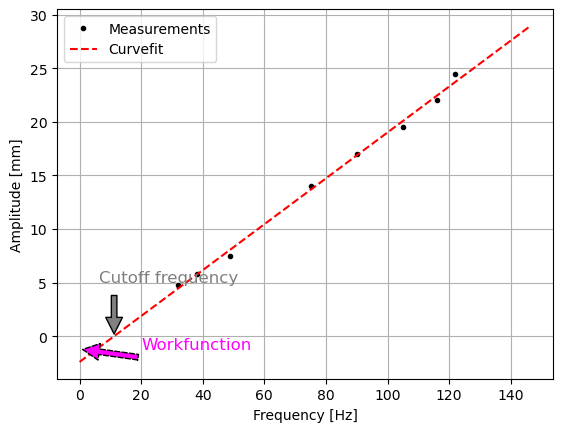

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#measurements 
frequency = np.array([32,38,49,75,90,105,116,122])
amplitude = np.array([4.8,5.8,7.5,14.0,17.0,19.5,22,24.5])

#curvefitting
def func(x, a, b):
    return a * x + b

variables, covariance = curve_fit(func, frequency, amplitude)

x_test = np.linspace(0, 1.2*max(frequency), 1000)
y_test = func(x_test, variables[0], variables[1])


plt.figure()
plt.plot(frequency, amplitude, 'k.', label='Measurements')
plt.plot(x_test, y_test, 'r--', label='Curvefit')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [mm]')


# Adding text at specific coordinates
plt.text(-variables[1]/variables[0]-5, 5, 'Cutoff frequency', fontsize=12, color='gray', rotation=0)
plt.text(20, variables[1]/2, 'Workfunction', fontsize=12, color='magenta', rotation=0)

# Adding an arrow
plt.annotate('', xy=(-variables[1]/variables[0], 0), xytext=(-variables[1]/variables[0], 4), arrowprops=dict(facecolor='gray', shrink=0.05))
plt.annotate('', xy=(0, variables[1]/2), xytext=(20, -2), arrowprops=dict(facecolor='magenta', shrink=0.05, linestyle='dashed'))

plt.grid()
plt.legend()
plt.show()